<a href="https://colab.research.google.com/github/Milltrader/MasteringDeepLearning/blob/main/NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification Types



1.   Binary
2.   Multi-class
3.   Multi-label



Generating Data

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=52)

print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[-0.7409712   0.61073201]
 [-0.16518405  0.77979567]
 [ 0.16356163  0.98122242]
 [ 0.04124283  0.82361677]
 [-0.64563802 -0.72901641]]

First 5 y labels:
[0 1 0 1 0]


In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0],
                       "X1": X[:, 1],
                       "label": y})

circles.head(), circles.label.value_counts()

(         X0        X1  label
 0 -0.740971  0.610732      0
 1 -0.165184  0.779796      1
 2  0.163562  0.981222      0
 3  0.041243  0.823617      1
 4 -0.645638 -0.729016      0,
 label
 0    500
 1    500
 Name: count, dtype: int64)

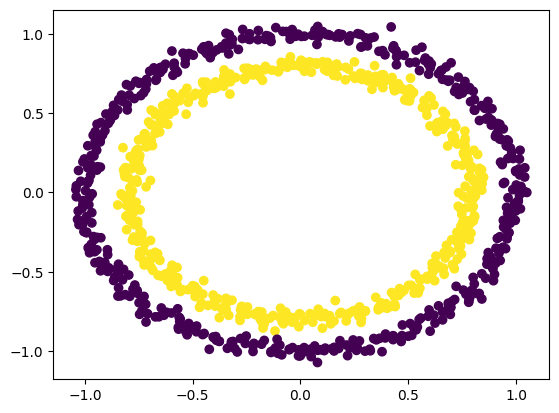

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y);

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.7409712   0.61073201] and the same for y: 0
Shapes for one sample of X: (2,) and the same for y: ()


In [ ]:
import torch

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn


device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

Alternative


In [ ]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.3851],
        [-0.1538],
        [ 0.0508],
        [ 0.0499],
        [-0.2968],
        [-0.3561],
        [-0.5173],
        [-0.2649],
        [ 0.2138],
        [-0.0918]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([0., 1., 0., 1., 1., 1., 0., 0., 1., 1.])


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)
#

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc


In [ ]:
y_logits = model_0(X_test.to(device))


In [ ]:
y_pred_probs = torch.sigmoid(y_logits)


In [ ]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
        0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
        1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
        1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
        1., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [ ]:
torch.manual_seed(52)
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_logites = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logites))

    test_loss = loss_fn(test_logites,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70371, Accuracy: 49.62% | Test loss: 0.70753, Test acc: 48.50%
Epoch: 10 | Loss: 0.70114, Accuracy: 50.12% | Test loss: 0.70536, Test acc: 49.50%
Epoch: 20 | Loss: 0.69945, Accuracy: 50.62% | Test loss: 0.70381, Test acc: 49.50%
Epoch: 30 | Loss: 0.69824, Accuracy: 50.38% | Test loss: 0.70259, Test acc: 49.00%
Epoch: 40 | Loss: 0.69733, Accuracy: 50.38% | Test loss: 0.70158, Test acc: 48.50%
Epoch: 50 | Loss: 0.69662, Accuracy: 50.50% | Test loss: 0.70073, Test acc: 49.00%
Epoch: 60 | Loss: 0.69605, Accuracy: 50.62% | Test loss: 0.70000, Test acc: 49.50%
Epoch: 70 | Loss: 0.69558, Accuracy: 50.75% | Test loss: 0.69937, Test acc: 49.00%
Epoch: 80 | Loss: 0.69519, Accuracy: 50.88% | Test loss: 0.69883, Test acc: 49.00%
Epoch: 90 | Loss: 0.69487, Accuracy: 50.88% | Test loss: 0.69835, Test acc: 48.50%


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


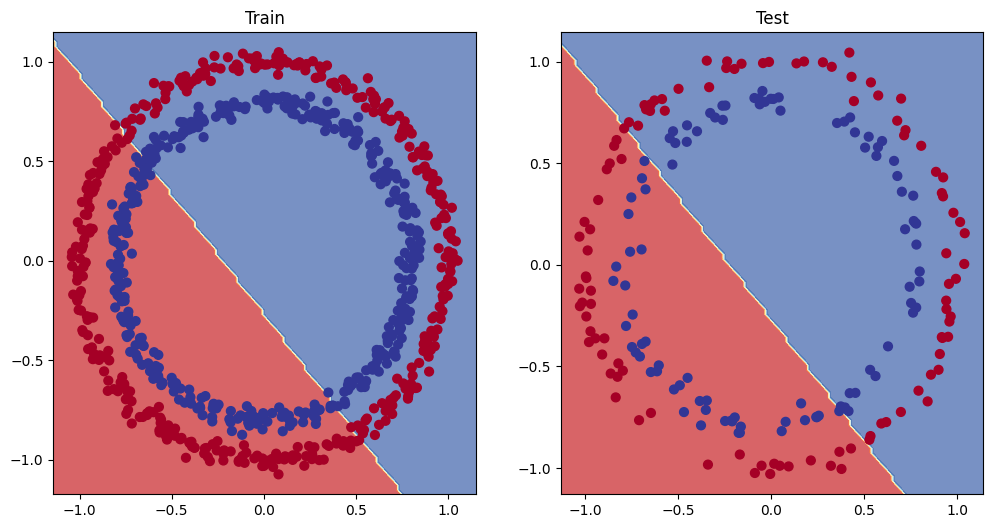

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### How to improve the model performance?


*   Add more layers
*   Add more hidden units (neurons)
*   More epochs
*   Change of the activation function
*   Change of the learning rate
*   Change loss
*   Switch to transfer learning: Take a pretrained model from a problem domain similar to yours and adjust it to your own problem



In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!

        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss_fn = nnBCELoss.() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(52)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69357, Accuracy: 47.50% | Test loss: 0.69240, Test acc: 52.50%
Epoch: 100 | Loss: 0.69315, Accuracy: 50.50% | Test loss: 0.69360, Test acc: 48.00%
Epoch: 200 | Loss: 0.69307, Accuracy: 50.50% | Test loss: 0.69388, Test acc: 48.00%
Epoch: 300 | Loss: 0.69303, Accuracy: 56.25% | Test loss: 0.69405, Test acc: 54.50%
Epoch: 400 | Loss: 0.69302, Accuracy: 56.50% | Test loss: 0.69415, Test acc: 49.00%
Epoch: 500 | Loss: 0.69301, Accuracy: 55.88% | Test loss: 0.69421, Test acc: 46.50%
Epoch: 600 | Loss: 0.69301, Accuracy: 54.62% | Test loss: 0.69426, Test acc: 47.00%
Epoch: 700 | Loss: 0.69301, Accuracy: 54.62% | Test loss: 0.69428, Test acc: 46.00%
Epoch: 800 | Loss: 0.69301, Accuracy: 54.50% | Test loss: 0.69430, Test acc: 46.00%
Epoch: 900 | Loss: 0.69301, Accuracy: 54.62% | Test loss: 0.69431, Test acc: 45.50%


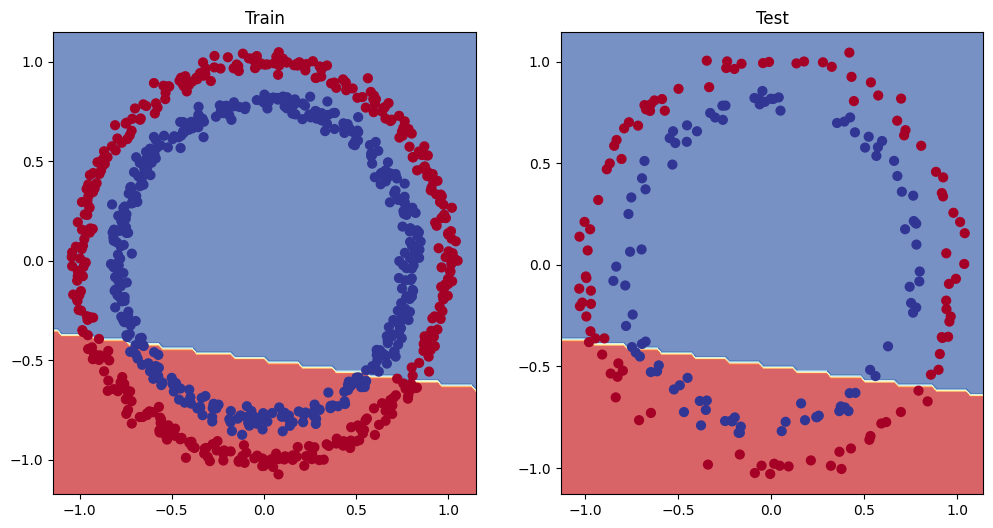

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Note: A helpful troubleshooting step when building deep learning models is to start as small as possible to see if the model works before scaling it up.

This could mean starting with a simple neural network (not many layers, not many hidden neurons) and a small dataset (like the one we've made) and then overfitting (making the model perform too well) on that small example before increasing the amount of data or the model size/design to reduce overfitting.

The model still sucks ass. Let's try to make it able to track non linear relationships.
I will recreate the data first


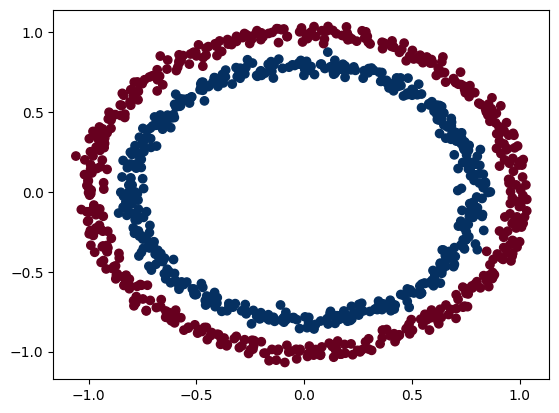

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
from torch import nn

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # <- add in ReLU activation function
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
     return self.layer_3(self.layer_2(self.relu(self.layer_1(x))))

model_with_relu = CircleModelV2().to(device)
print(model_with_relu)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_with_relu.parameters(), lr=0.1)

In [ ]:
# Fit the model
torch.manual_seed(52)
epochs = 10000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_with_relu(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_with_relu.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_with_relu(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69478, Accuracy: 50.00% | Test Loss: 0.69342, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69328, Accuracy: 48.00% | Test Loss: 0.69236, Test Accuracy: 52.00%
Epoch: 200 | Loss: 0.69229, Accuracy: 50.62% | Test Loss: 0.69149, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.69119, Accuracy: 51.50% | Test Loss: 0.69050, Test Accuracy: 57.00%
Epoch: 400 | Loss: 0.68973, Accuracy: 52.38% | Test Loss: 0.68919, Test Accuracy: 56.00%
Epoch: 500 | Loss: 0.68748, Accuracy: 56.88% | Test Loss: 0.68724, Test Accuracy: 60.00%
Epoch: 600 | Loss: 0.68406, Accuracy: 58.50% | Test Loss: 0.68426, Test Accuracy: 63.50%
Epoch: 700 | Loss: 0.67890, Accuracy: 57.00% | Test Loss: 0.67946, Test Accuracy: 61.00%
Epoch: 800 | Loss: 0.67135, Accuracy: 57.00% | Test Loss: 0.67183, Test Accuracy: 59.00%
Epoch: 900 | Loss: 0.65970, Accuracy: 59.25% | Test Loss: 0.65983, Test Accuracy: 61.00%
Epoch: 1000 | Loss: 0.63753, Accuracy: 63.25% | Test Loss: 0.63828, Test Accuracy: 65.00%
Epoch: 1100 | Loss: 0.

In [ ]:
# Make predictions
model_with_relu.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_with_relu(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

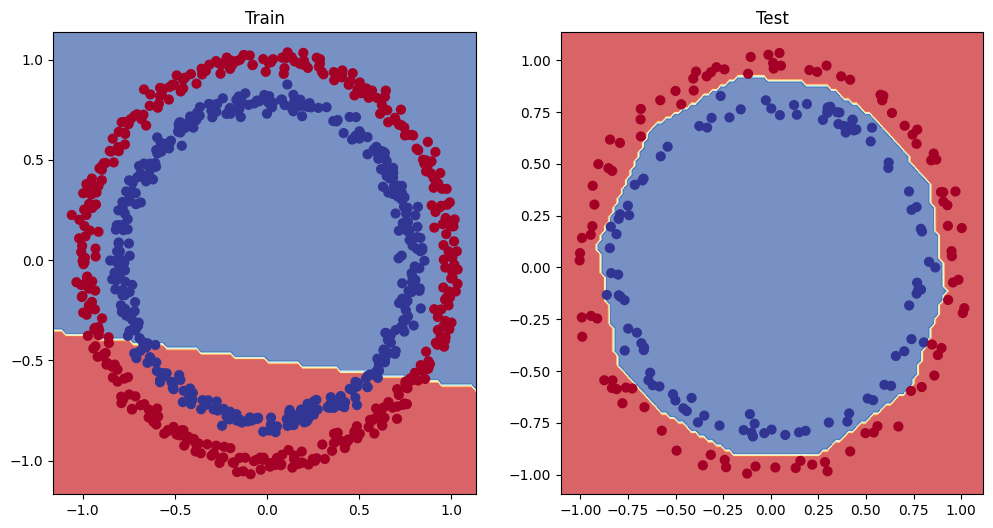

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_with_relu, X_test, y_test) #  has non-linearity

### Multi-class Classification

tensor([[-9.3980,  9.8576],
        [ 7.5080, -8.8779],
        [-6.7575,  1.9912],
        [-8.9868,  4.4120],
        [-6.9580,  1.8792]]) tensor([3, 0, 1, 2, 1])


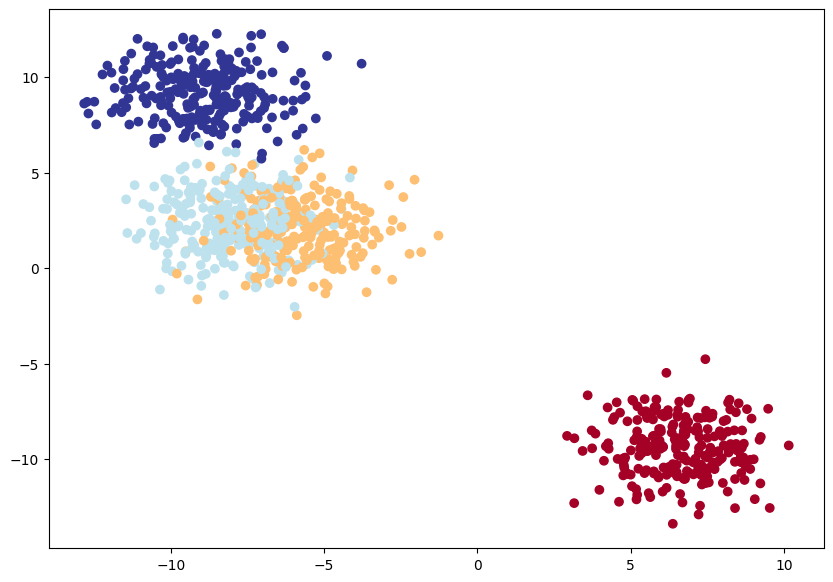

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 52

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_feat, output_feat, hidden_units=8):
    """
        Args:
        input_features (int): Number of input features to the model.
        out_features (int): Number of output features of the model
          (how many classes there are).
        hidden_units (int): Number of hidden units between layers, default 8.
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(nn.Linear(in_features=input_feat, out_features=hidden_units),
                                            nn.ReLU(),
                                            nn.Linear(in_features=hidden_units, out_features=hidden_units),
                                            nn.ReLU(),
                                            nn.Linear(in_features=hidden_units, out_features=output_feat))
  def forward(self, x):
      return self.linear_layer_stack(x)

model_multi_class = BlobModel(input_feat=NUM_FEATURES, output_feat=NUM_CLASSES).to(device)
model_multi_class


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_multi_class.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [ ]:
model_multi_class(X_blob_train.to(device))[:5]

tensor([[-0.2535, -0.2334, -0.3498, -0.1464],
        [-0.3734,  0.0947, -0.1281, -0.2371],
        [-0.3527, -0.3185, -0.4275, -0.0476],
        [-0.4082,  0.1692, -0.1072, -0.2420],
        [-0.3478,  0.1572, -0.1604, -0.2491]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
model_multi_class(X_blob_train.to(device))[0].shape, NUM_CLASSES


(torch.Size([4]), 4)

In [ ]:
# Make prediction logits with model

y_logits = model_multi_class(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([[-0.4479,  0.2099, -0.0720, -0.2438],
        [-0.3793,  0.3073,  0.0626, -0.3535],
        [-0.5189,  0.2562, -0.0023, -0.2450],
        [-0.3274, -0.2968, -0.4077, -0.0728],
        [-0.4240,  0.1311, -0.0793, -0.2382]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1782, 0.3439, 0.2594, 0.2185],
        [0.1796, 0.3568, 0.2793, 0.1843],
        [0.1623, 0.3523, 0.2720, 0.2134],
        [0.2356, 0.2430, 0.2175, 0.3040],
        [0.1866, 0.3252, 0.2635, 0.2247]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([0.1782, 0.3439, 0.2594, 0.2185], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')


In [ ]:
# Fit the model
torch.manual_seed(52)

# Set number of epochs
epochs = 500

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_multi_class.train()

    # 1. Forward pass
    y_logits = model_multi_class(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_multi_class.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_multi_class(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.25767, Acc: 88.12% | Test Loss: 0.25357, Test Acc: 89.00%
Epoch: 10 | Loss: 0.26181, Acc: 87.75% | Test Loss: 0.25445, Test Acc: 89.00%
Epoch: 20 | Loss: 0.26500, Acc: 87.62% | Test Loss: 0.25540, Test Acc: 88.00%
Epoch: 30 | Loss: 0.26394, Acc: 87.62% | Test Loss: 0.25481, Test Acc: 87.50%
Epoch: 40 | Loss: 0.26006, Acc: 87.88% | Test Loss: 0.25352, Test Acc: 89.50%
Epoch: 50 | Loss: 0.25805, Acc: 88.25% | Test Loss: 0.25249, Test Acc: 89.50%
Epoch: 60 | Loss: 0.25710, Acc: 88.00% | Test Loss: 0.25201, Test Acc: 89.00%
Epoch: 70 | Loss: 0.25667, Acc: 88.25% | Test Loss: 0.25161, Test Acc: 89.00%
Epoch: 80 | Loss: 0.25858, Acc: 88.00% | Test Loss: 0.25132, Test Acc: 89.50%
Epoch: 90 | Loss: 0.26546, Acc: 87.50% | Test Loss: 0.25331, Test Acc: 88.50%
Epoch: 100 | Loss: 0.27125, Acc: 87.25% | Test Loss: 0.25481, Test Acc: 89.00%
Epoch: 110 | Loss: 0.26451, Acc: 87.50% | Test Loss: 0.25260, Test Acc: 88.00%
Epoch: 120 | Loss: 0.25721, Acc: 88.00% | Test Loss: 0.25088, T

tensor([[ -4.5815,   3.5642,   4.2628,  -3.8221],
        [ -3.2355,   3.6570,   1.8642,  -2.8344],
        [ -5.0897,   3.2137,   4.4014,  -3.3016],
        [  3.8242,  -0.5001,  -2.0929,  -2.2142],
        [ -2.1338,   4.9593,   3.4327,  -5.9888],
        [ -5.7001,   2.9974,   4.6814,  -2.9142],
        [-11.5318,  -1.5063,  -0.6197,  10.3845],
        [ -3.4836,   4.2101,   3.9016,  -4.8174],
        [ -2.3531,   4.7863,   3.3880,  -5.6614],
        [-10.8226,  -2.0708,   0.6108,   8.3558]], device='cuda:0')
Predictions: tensor([2, 1, 2, 0, 1, 2, 3, 1, 1, 3], device='cuda:0')
Labels: tensor([1, 1, 2, 0, 1, 2, 3, 1, 1, 3], device='cuda:0')
Test accuracy: 87.5%


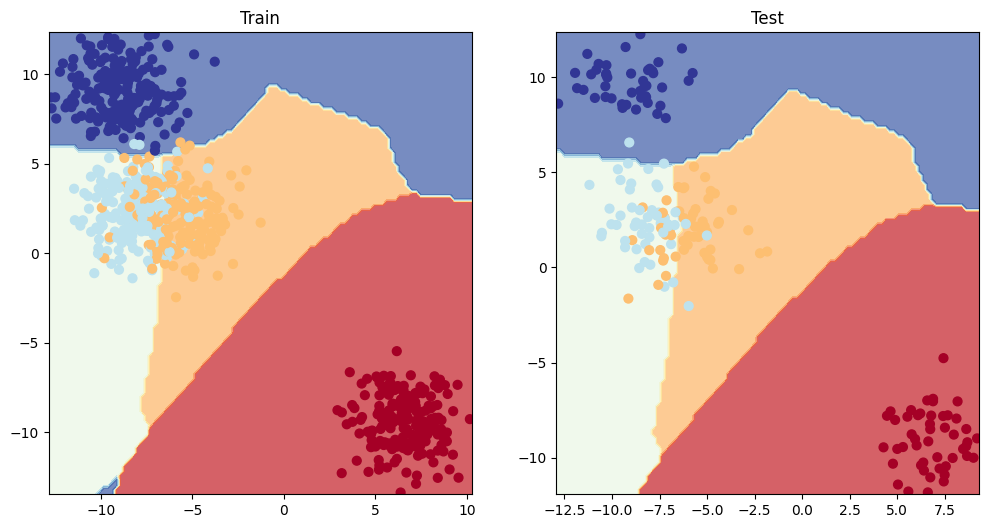

In [ ]:
# Make predictions
model_multi_class.eval()
with torch.inference_mode():
    y_logits = model_multi_class(X_blob_test)

# View the first 10 predictions
print(y_logits[:10])

# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_multi_class, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_multi_class, X_blob_test, y_blob_test)